### Capricorn - Logs analyzer

This file contains the differents python functions to analyze the logs produced by the Capricorn system.

Here is the points that we will analyze:

- Number of cesnas in the simulation
- Speed of the cesnas
- Number of cesnas that were catched
- Number of shot on the factory
- Number of missed missiles
- Number of missed cesnas
- Distance of interception (mean, min, max)

Nombre de cesnas : 40
Vitesse des cesnas : 200.0 km/h
Nombre de cesnas interceptés : 19
Nombre de tirs sur l'usine : 25
Nombre de missiles manqués : 82
Nombre de cesnas manqués : 21
Distance d'interception (moyenne) : 154.25
Distance d'interception (min) : 20.00
Distance d'interception (max) : 250.07
Pourcentage de réussite des interceptions : 47.50%


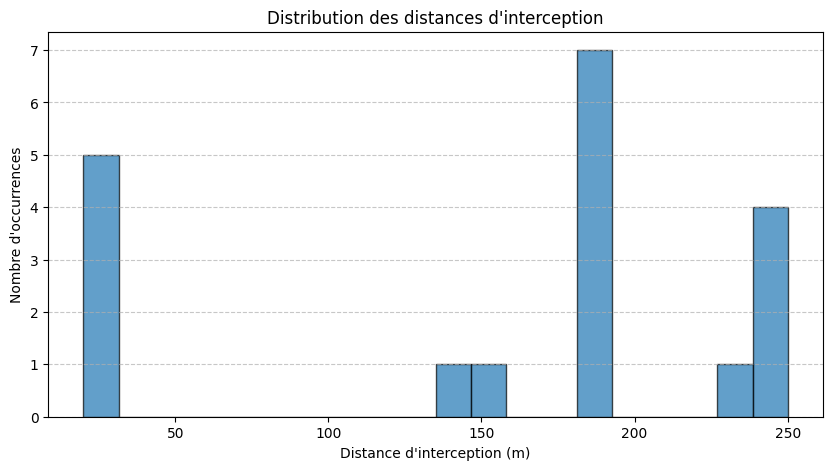

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Charger tous les fichiers CSV du dossier log
log_dir = "../log"  
csv_files = glob.glob(os.path.join(log_dir, "*.csv"))

if not csv_files:
    print("Aucun fichier CSV trouvé dans le dossier log.")
else:
    # Charger et concaténer tous les fichiers CSV
    df = pd.concat([pd.read_csv(file, delimiter=";") for file in csv_files], ignore_index=True)

    # Nombre de cesnas dans la simulation
    num_cesnas = df[df["Fonction"] == "scenario_simple"]["Message"].str.extract(r'nb_mobiles,(\d+)').dropna().astype(int).sum()[0]

    # Vitesse des cesnas
    cesna_speed = df[df["Fonction"] == "scenario_simple"]["Message"].str.extract(r'mobiles_speed,([\d.]+)').dropna().astype(float).mean()[0]

    # Nombre de cesnas interceptés
    num_cesnas_caught = df[df["Fonction"] == "checkImpact"]["Message"].str.contains("Interception_mobile").sum()

    # Nombre de tirs sur l’usine
    num_factory_shots = df[df["Fonction"] == "propertyChange"]["Message"].str.contains("factory_damage").sum()

    # Nombre de missiles manqués (missile_shot - interceptions)
    num_missiles_shot = df[df["Fonction"] == "scheduleFireMissile"]["Message"].str.contains("missile_shot").sum()
    num_missiles_missed = num_missiles_shot - num_cesnas_caught

    # Nombre de cesnas non interceptés
    num_cesnas_missed = num_cesnas - num_cesnas_caught

    # Distances d'interception
    distances = df[df["Fonction"] == "checkImpact"]["Message"].str.extract(r'distance, ([\d.]+)').dropna().astype(float)
    mean_distance = distances.mean()[0]
    min_distance = distances.min()[0]
    max_distance = distances.max()[0]

    # Résumé des résultats
    print(f"Nombre de cesnas : {num_cesnas}")
    print(f"Vitesse des cesnas : {cesna_speed} km/h")
    print(f"Nombre de cesnas interceptés : {num_cesnas_caught}")
    print(f"Nombre de tirs sur l'usine : {num_factory_shots}")
    print(f"Nombre de missiles manqués : {num_missiles_missed}")
    print(f"Nombre de cesnas manqués : {num_cesnas_missed}")
    print(f"Distance d'interception (moyenne) : {mean_distance:.2f}")
    print(f"Distance d'interception (min) : {min_distance:.2f}")
    print(f"Distance d'interception (max) : {max_distance:.2f}")

    # pourcentage de réussite des interceptions
    intercept_success_rate = num_cesnas_caught / num_cesnas * 100
    print(f"Pourcentage de réussite des interceptions : {intercept_success_rate:.2f}%")
  
    plt.figure(figsize=(10, 5))
    plt.hist(distances[0], bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel("Distance d'interception (m)")
    plt.ylabel("Nombre d'occurrences")
    plt.title("Distribution des distances d'interception")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
